# Plot mice performances on Cheeseboard Maze task

In [227]:
import pandas as pd
from ipyfilechooser import FileChooser
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib widget

try:
    %store -r filename
    filename = os.path.dirname(filename)
except NameError:
    filename = "//10.69.168.1/crnldata/forgetting/Aurelie/CheeseboardExperiment/DAQ_data/AB/"

fc1 = FileChooser(filename, select_default=True, show_only_dirs=False, title="<b>Choose Summary Table excel file</b>")
display(fc1)

def update_file(chooser):
    global filename
    if chooser.selected:
        filename = chooser.selected
        %store filename

fc1.register_callback(update_file)

FileChooser(path='\\10.69.168.1\crnldata\forgetting\Aurelie\CheeseboardExperiment\DAQ_data\AB\Training\Green\C…

Stored 'filename' (str)


Results per day (n = trials)

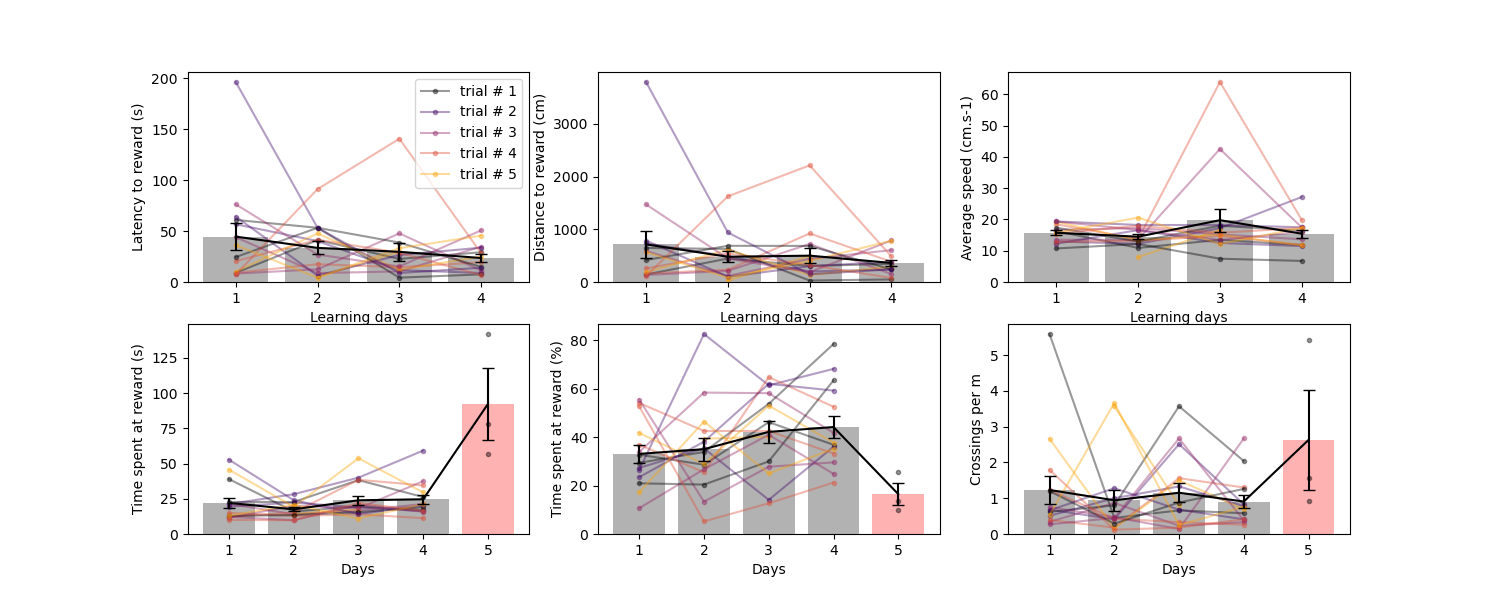

In [314]:
Summary_table = pd.read_excel(filename)
Summary_table_Training = Summary_table[Summary_table['session_type'] == 'Training'] 
Nb_learning_sessions=np.size(Summary_table_Training['session'].unique())
import matplotlib
##############################

latency_to_reward_s = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice'], Summary_table_Training['trial']], columns=[Summary_table_Training['session']], values='latency_to_reward_s', aggfunc='mean', fill_value=None)
mean=np.nanmean(latency_to_reward_s.values, axis=0)
sem=stats.sem(latency_to_reward_s.values, nan_policy='omit')

fig, axs = plt.subplots(2,3, figsize=(15, 6))
unique_groups = latency_to_reward_s.index.get_level_values(1).unique()  # Unique groups for coloring
colors = matplotlib.colormaps["inferno"]  # Access colormap directly
color_map = {category: colors(i / len(unique_groups)) for i, category in enumerate(unique_groups)}  # Normalize index for colormap

for (group, category), row in latency_to_reward_s.iterrows():
    label = f'trial # {category}' if f'trial # {category}' not in axs[0,0].get_legend_handles_labels()[1] else None
    axs[0,0].plot(row.index, row.values, label=label, color=color_map[category], marker='.', alpha=0.4)
axs[0,0].bar(latency_to_reward_s.columns.values, mean, color="k", alpha=0.3)
axs[0,0].errorbar(latency_to_reward_s.columns.values,mean, yerr=sem, color="k", capsize=4)
axs[0,0].set(ylabel='Latency to reward (s)')
axs[0,0].set(xlabel='Learning days')
axs[0,0].legend()
#axs[0,0].legend(bbox_to_anchor=[-0.2,1])

##############################

distance_to_reward_cm = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice'], Summary_table_Training['trial']], columns=[Summary_table_Training['session']], values='distance_to_reward_cm', aggfunc='mean', fill_value=None)
mean=np.nanmean(distance_to_reward_cm.values, axis=0)
sem=stats.sem(distance_to_reward_cm.values, nan_policy='omit')

for (group, category), row in distance_to_reward_cm.iterrows():
    axs[0,1].plot(row.index, row.values, label=label, color=color_map[category], marker='.', alpha=0.4)
axs[0,1].bar(distance_to_reward_cm.columns.values, mean, color="k", alpha=0.3)
axs[0,1].errorbar(distance_to_reward_cm.columns.values,mean, yerr=sem, color="k", capsize=4)
axs[0,1].set(ylabel='Distance to reward (cm)')
axs[0,1].set(xlabel='Learning days')

##############################

average_speed = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice'], Summary_table_Training['trial']], columns=[Summary_table_Training['session']], values='average_speed', aggfunc='mean', fill_value=None)
mean=np.nanmean(average_speed.values, axis=0)
sem=stats.sem(average_speed.values, nan_policy='omit')

for (group, category), row in average_speed.iterrows():
    axs[0,2].plot(row.index, row.values, label=label, color=color_map[category], marker='.', alpha=0.4)
axs[0,2].bar(average_speed.columns.values, mean, color="k", alpha=0.3)
axs[0,2].errorbar(average_speed.columns.values,mean, yerr=sem, color="k", capsize=4)
axs[0,2].set(ylabel='Average speed (cm.s-1)')
axs[0,2].set(xlabel='Learning days')

##############################

Summary_table_Test = Summary_table[Summary_table['session_type'] == 'Test'] 

##############################

time_spent_at_reward_s = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice'], Summary_table_Training['trial']], columns=[Summary_table_Training['session']], values='time_spent_at_reward_s', aggfunc='mean', fill_value=None)
mean=np.nanmean(time_spent_at_reward_s.values, axis=0)
sem=stats.sem(time_spent_at_reward_s.values, nan_policy='omit')

for (group, category), row in time_spent_at_reward_s.iterrows():
    axs[1,0].plot(row.index, row.values, label=label, color=color_map[category], marker='.', alpha=0.4)
axs[1,0].bar(time_spent_at_reward_s.columns.values, mean, color="k", alpha=0.3)

time_spent_at_reward_s=Summary_table_Test['time_spent_at_reward_s']
meanT=np.nanmean(time_spent_at_reward_s.values, axis=0)
semT=stats.sem(time_spent_at_reward_s.values, nan_policy='omit')

axs[1,0].plot([Nb_learning_sessions+1], np.array(time_spent_at_reward_s.values)[np.newaxis], alpha=0.4, marker='.', color=color_map[1])
axs[1,0].bar([Nb_learning_sessions+1], meanT, color="r", alpha=0.3)
axs[1,0].errorbar(np.arange(Nb_learning_sessions+1)+1,np.concatenate((mean, np.array(meanT)[np.newaxis])), yerr=np.concatenate((sem, np.array(semT)[np.newaxis])), color="k", capsize=4)
axs[1,0].set(ylabel='Time spent at reward (s)')
axs[1,0].set(xlabel='Days')

##############################

time_spent_at_reward_s = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice'], Summary_table_Training['trial']], columns=[Summary_table_Training['session']], values='time_spent_at_reward_s', aggfunc='mean', fill_value=None)
duration_trial_s = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice'], Summary_table_Training['trial']], columns=[Summary_table_Training['session']], values='duration_trial_s', aggfunc='mean', fill_value=None)
perc_time_spent_at_reward=time_spent_at_reward_s/duration_trial_s*100
mean=np.nanmean(perc_time_spent_at_reward.values, axis=0)
sem=stats.sem(perc_time_spent_at_reward.values, nan_policy='omit')

for (group, category), row in perc_time_spent_at_reward.iterrows():
    axs[1,1].plot(row.index, row.values, label=label, color=color_map[category], marker='.', alpha=0.4)
axs[1,1].bar(duration_trial_s.columns.values, mean, color="k", alpha=0.3)

time_spent_at_reward_s=Summary_table_Test['time_spent_at_reward_s']
duration_trial_s=Summary_table_Test['duration_trial_s']
perc_time_spent_at_reward=time_spent_at_reward_s/duration_trial_s*100
meanT=np.nanmean(perc_time_spent_at_reward.values, axis=0)
semT=stats.sem(perc_time_spent_at_reward.values, nan_policy='omit')

axs[1,1].plot([Nb_learning_sessions+1], np.array(perc_time_spent_at_reward.values)[np.newaxis], alpha=0.4, marker='.', color=color_map[1])
axs[1,1].bar([Nb_learning_sessions+1], meanT, color="r", alpha=0.3)
axs[1,1].errorbar(np.arange(Nb_learning_sessions+1)+1,np.concatenate((mean, np.array(meanT)[np.newaxis])), yerr=np.concatenate((sem, np.array(semT)[np.newaxis])), color="k", capsize=4)
axs[1,1].set(ylabel='Time spent at reward (%)')
axs[1,1].set(xlabel='Days')

##############################

crossings_per_m = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice'], Summary_table_Training['trial']], columns=[Summary_table_Training['session']], values='crossings_per_m', aggfunc='mean', fill_value=None)
mean=np.nanmean(crossings_per_m.values, axis=0)
sem=stats.sem(crossings_per_m.values, nan_policy='omit')

for (group, category), row in crossings_per_m.iterrows():
    axs[1,2].plot(row.index, row.values, label=label, color=color_map[category], marker='.', alpha=0.4)
axs[1,2].bar(crossings_per_m.columns.values, mean, color="k", alpha=0.3)

crossings_per_m=Summary_table_Test['crossings_per_m']
meanT=np.nanmean(crossings_per_m.values, axis=0)
semT=stats.sem(crossings_per_m.values, nan_policy='omit')

axs[1,2].plot([Nb_learning_sessions+1], np.array(crossings_per_m.values)[np.newaxis], alpha=0.4, marker='.', color=color_map[1])
axs[1,2].bar([Nb_learning_sessions+1], meanT, color="r", alpha=0.3)
axs[1,2].errorbar(np.arange(Nb_learning_sessions+1)+1,np.concatenate((mean, np.array(meanT)[np.newaxis])), yerr=np.concatenate((sem, np.array(semT)[np.newaxis])), color="k", capsize=4)
axs[1,2].set(ylabel='Crossings per m')
axs[1,2].set(xlabel='Days')

plt.show()

Results per trial (n = mice)

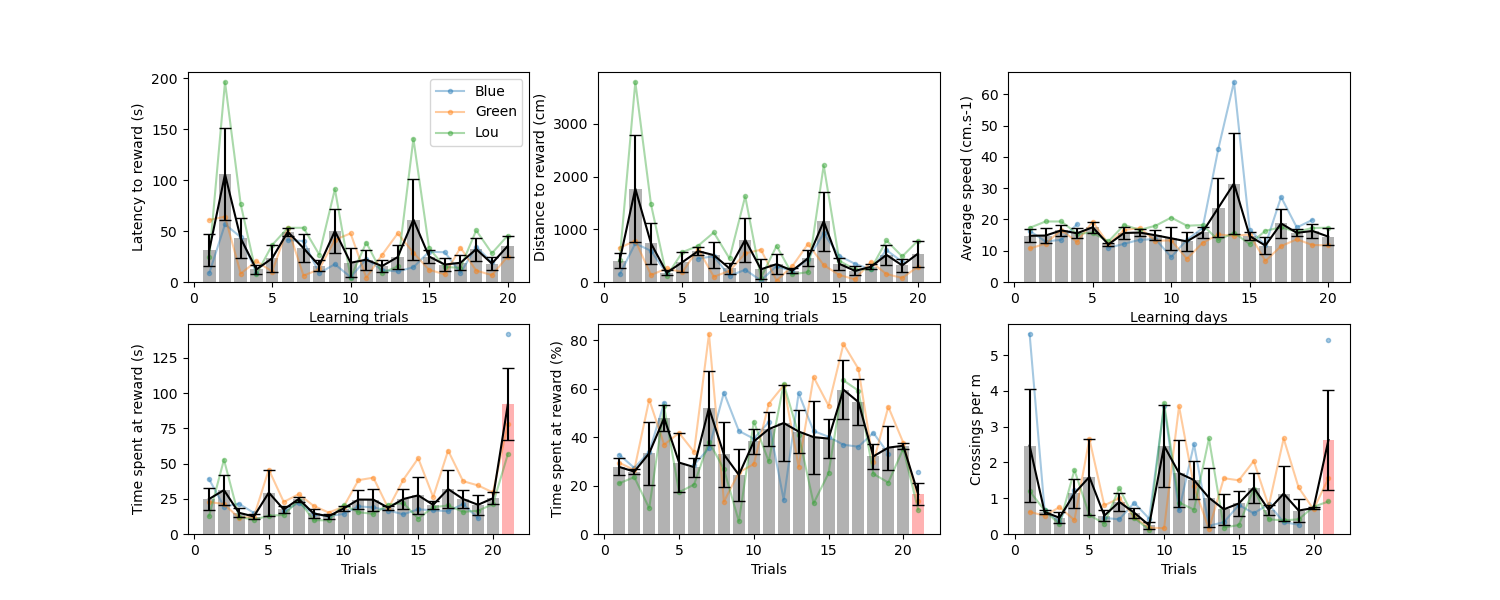

In [229]:
Summary_table = pd.read_excel(filename)
Summary_table_Training = Summary_table[Summary_table['session_type'] == 'Training'] 
Nb_learning_trials=np.size(Summary_table_Training['trial'].unique())*np.size(Summary_table_Training['session'].unique())

##############################

latency_to_reward_s = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice']], columns=[Summary_table_Training['session'], Summary_table_Training['trial']], values='latency_to_reward_s', aggfunc='mean', fill_value=None)
mean=np.nanmean(latency_to_reward_s.values, axis=0)
sem=stats.sem(latency_to_reward_s.values, nan_policy='omit')

fig, axs = plt.subplots(2,3, figsize=(15, 6))

axs[0,0].plot(np.arange(len(mean))+1,latency_to_reward_s.values.T, alpha=0.4, label=latency_to_reward_s.index, marker='.')
axs[0,0].bar(np.arange(len(mean))+1, mean, color="k", alpha=0.3)
axs[0,0].errorbar(np.arange(len(mean))+1,mean, yerr=sem, color="k", capsize=4)
axs[0,0].set(ylabel='Latency to reward (s)')
axs[0,0].set(xlabel='Learning trials')
axs[0,0].legend()

##############################

distance_to_reward_cm = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice']], columns=[Summary_table_Training['session'], Summary_table_Training['trial']], values='distance_to_reward_cm', aggfunc='mean', fill_value=None)
mean=np.nanmean(distance_to_reward_cm.values, axis=0)
sem=stats.sem(distance_to_reward_cm.values, nan_policy='omit')

axs[0,1].plot(np.arange(len(mean))+1,distance_to_reward_cm.values.T, alpha=0.4, marker='.')
axs[0,1].bar(np.arange(len(mean))+1, mean, color="k", alpha=0.3)
axs[0,1].errorbar(np.arange(len(mean))+1,mean, yerr=sem, color="k", capsize=4)
axs[0,1].set(ylabel='Distance to reward (cm)')
axs[0,1].set(xlabel='Learning trials')

##############################

average_speed = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice']], columns=[Summary_table_Training['session'], Summary_table_Training['trial']], values='average_speed', aggfunc='mean', fill_value=None)
mean=np.nanmean(average_speed.values, axis=0)
sem=stats.sem(average_speed.values, nan_policy='omit')

axs[0,2].plot(np.arange(len(mean))+1,average_speed.values.T, alpha=0.4, marker='.')
axs[0,2].bar(np.arange(len(mean))+1, mean, color="k", alpha=0.3)
axs[0,2].errorbar(np.arange(len(mean))+1,mean, yerr=sem, color="k", capsize=4)
axs[0,2].set(ylabel='Average speed (cm.s-1)')
axs[0,2].set(xlabel='Learning days')

##############################

Summary_table_Test = Summary_table[Summary_table['session_type'] == 'Test'] 

##############################

time_spent_at_reward_s = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice']], columns=[Summary_table_Training['session'], Summary_table_Training['trial']], values='time_spent_at_reward_s', aggfunc='mean', fill_value=None)
mean=np.nanmean(time_spent_at_reward_s.values, axis=0)
sem=stats.sem(time_spent_at_reward_s.values, nan_policy='omit')

axs[1,0].bar(np.arange(len(mean))+1, mean, color="k", alpha=0.3)

time_spent_at_reward_sT=Summary_table_Test['time_spent_at_reward_s']
meanT=np.nanmean(time_spent_at_reward_sT.values, axis=0)
semT=stats.sem(time_spent_at_reward_sT.values, nan_policy='omit')

axs[1,0].plot(np.arange(Nb_learning_trials+1)+1,np.concatenate((time_spent_at_reward_s,np.array(time_spent_at_reward_sT)[:,np.newaxis]), axis=1).T, alpha=0.4, marker='.')
axs[1,0].bar([Nb_learning_trials+1], meanT, color="r", alpha=0.3)
axs[1,0].errorbar(np.arange(Nb_learning_trials+1)+1,np.concatenate((mean, np.array(meanT)[np.newaxis])), yerr=np.concatenate((sem, np.array(semT)[np.newaxis])), color="k", capsize=4)
axs[1,0].set(ylabel='Time spent at reward (s)')
axs[1,0].set(xlabel='Trials')

##############################

time_spent_at_reward_s = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice']], columns=[Summary_table_Training['session'], Summary_table_Training['trial']], values='time_spent_at_reward_s', aggfunc='mean', fill_value=None)
duration_trial_s = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice']], columns=[Summary_table_Training['session'], Summary_table_Training['trial']], values='duration_trial_s', aggfunc='mean', fill_value=None)
perc_time_spent_at_reward=time_spent_at_reward_s/duration_trial_s*100
mean=np.nanmean(perc_time_spent_at_reward.values, axis=0)
sem=stats.sem(perc_time_spent_at_reward.values, nan_policy='omit')

time_spent_at_reward_s=Summary_table_Test['time_spent_at_reward_s']
duration_trial_s=Summary_table_Test['duration_trial_s']
perc_time_spent_at_rewardT=time_spent_at_reward_s/duration_trial_s*100
meanT=np.nanmean(perc_time_spent_at_rewardT.values, axis=0)
semT=stats.sem(perc_time_spent_at_rewardT.values, nan_policy='omit')

axs[1,1].plot(np.arange(Nb_learning_trials+1)+1,np.concatenate((perc_time_spent_at_reward,np.array(perc_time_spent_at_rewardT)[:,np.newaxis]), axis=1).T, alpha=0.4, marker='.')
axs[1,1].bar(np.arange(len(mean))+1, mean, color="k", alpha=0.3)
axs[1,1].bar([Nb_learning_trials+1], meanT, color="r", alpha=0.3)
axs[1,1].errorbar(np.arange(Nb_learning_trials+1)+1,np.concatenate((mean, np.array(meanT)[np.newaxis])), yerr=np.concatenate((sem, np.array(semT)[np.newaxis])), color="k", capsize=4)
axs[1,1].set(ylabel='Time spent at reward (%)')
axs[1,1].set(xlabel='Trials')

##############################

crossings_per_m = Summary_table_Training.pivot_table(index=[Summary_table_Training['mice']], columns=[Summary_table_Training['session'], Summary_table_Training['trial']], values='crossings_per_m', aggfunc='mean', fill_value=None)
mean=np.nanmean(crossings_per_m.values, axis=0)
sem=stats.sem(crossings_per_m.values, nan_policy='omit')

crossings_per_mT=Summary_table_Test['crossings_per_m']
meanT=np.nanmean(crossings_per_mT.values, axis=0)
semT=stats.sem(crossings_per_mT.values, nan_policy='omit')

axs[1,2].plot(np.arange(Nb_learning_trials+1)+1,np.concatenate((crossings_per_m,np.array(crossings_per_mT)[:,np.newaxis]), axis=1).T, alpha=0.4, marker='.')
axs[1,2].bar(np.arange(len(mean))+1, mean, color="k", alpha=0.3)
axs[1,2].bar([Nb_learning_trials+1], meanT, color="r", alpha=0.3)
axs[1,2].errorbar(np.arange(Nb_learning_trials+1)+1,np.concatenate((mean, np.array(meanT)[np.newaxis])), yerr=np.concatenate((sem, np.array(semT)[np.newaxis])), color="k", capsize=4)
axs[1,2].set(ylabel='Crossings per m')
axs[1,2].set(xlabel='Trials')

plt.show()